# Welcome!
Today, we'll be using qBraid to understand how to embed classical images into quantum registers, the current embedding implementations, and the current limitations and problems at hand. 

## Getting Started on qBraid

### Step 1.
If you haven't already done so, please make a qBraid account and add the access code `EHNU6626` on the account.qbraid.com/account-details page. 


### Step 2.
Then click on the `Launch on qBraid` button in the README.md of this repository. The button will automatically clone the repository and take you to your *new* qBraid Lab integrated development environment. 

### Step 3.
Finally, install the qBraid-SDK environment via the qBraid Lab Environment Manager. On Lab you should see the `ENVS` icon on the right. The qBraid Lab Environment Manager is a robust package and virtual environment management system provided to qBraid end-users through a simple, intuitive graphical user interface. To expand the Environment Manager sidebar, click on Envs in the upper-right of the Lab console. My Environments are your currently installed environments. The qBraid Default environment and Microsoft Q# environment are installed by default.

Install environment
1. In the Environment Manager sidebar, click Add to view the environments available to install.

Choose the qBraid SDK, expand its panel, and click Install.

<img src="./_images/env_install.png">

3. Once the installation has started, the pannel is moved to the My Environments tab. Click Browse Environments to return to the My Environments tab and view its progress.



Browse Environments to return to the My Environments tab and view its progress.

<img src="./_images/env_installing.png">

4. When the installation is complete, the environment panel’s action button will switch from Installing… to Activate. Clicking Activate creates a new ipykernel, see Kernels for more.

<img src="./_images/kernel_activate.png">

To uninstall the environment, click on More, and then Uninstall. Learn more about qBraid Lab Environment Manager [here](https://qbraid-qbraid.readthedocs-hosted.com/en/stable/lab/environments.html#)

## Activate the qBraid SDK kernel
Under My Environments, choose the environment, and expand its pannel. Click Activate to activate the environment and create an associated ipykernel.

<img src="./_images/kernel_activate.png">

Switch notebook kernel
In the Launcher tab, under Notebooks, clicking on an ipykernel associated with an activated environment will automatically launch a Jupyter notebook (.ipynb file) using that kernel. In the upper-right of the newly created notebook, you can see which kernel is in use.

<img src="./_images/kernel_nb.png">

Clicking on the name of the current kernel, as circled above, will open the kernel selector, and allow you switch to any other active kernel.

<img src="./_images/kernel_switch.png">


Next we'll install tensorflow:

In [1]:
%pip install tensorflow
%pip install tensorboard
%pip install scikit-plot

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 881.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 612.8 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 966.3 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 765.0 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 983.3 kB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 527.1 kB/s eta 0:00:001m540.9 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [24]:
import os

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
# import qbraid
from scikitplot.metrics import plot_confusion_matrix
import tensorflow as tf



%matplotlib inline
# CONSTANTS
NUM_EXAMPLES=500
os.environ['TENSORBOARD_BINARY'] = '/home/jovyan/.qbraid/environments/qbraid_sdk_9j9sjy/pyenv/bin/tensorboard'
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# MNIST
The MNIST (Modified National Institute of Standards and Technology) database contains 70,000 28 x 28 images of handwritten digits from 0-9 and is seminal to machine learning. The MNIST handwritten dataset is the “Hello World” implementation for machine learning, and the dataset is used as a worldwide machine learning benchmark. 


## Starting off with a classical implementation
We will first load the data and apply a classical CNN (Convolutional Neural Network) to understand the mechanics of image classification.

### Loading the data
We load the data from tensorflow, a machine learning package developed by Google.

In [25]:
# Normalize the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


We one hot encode the categories into ten classes.

In [26]:
y_train_onehot = tf.one_hot(y_train,10)
y_test_onehot = tf.one_hot(y_test,10)

Let's plot the images to see what we're going to be classifying and embedding into quantum circuits.

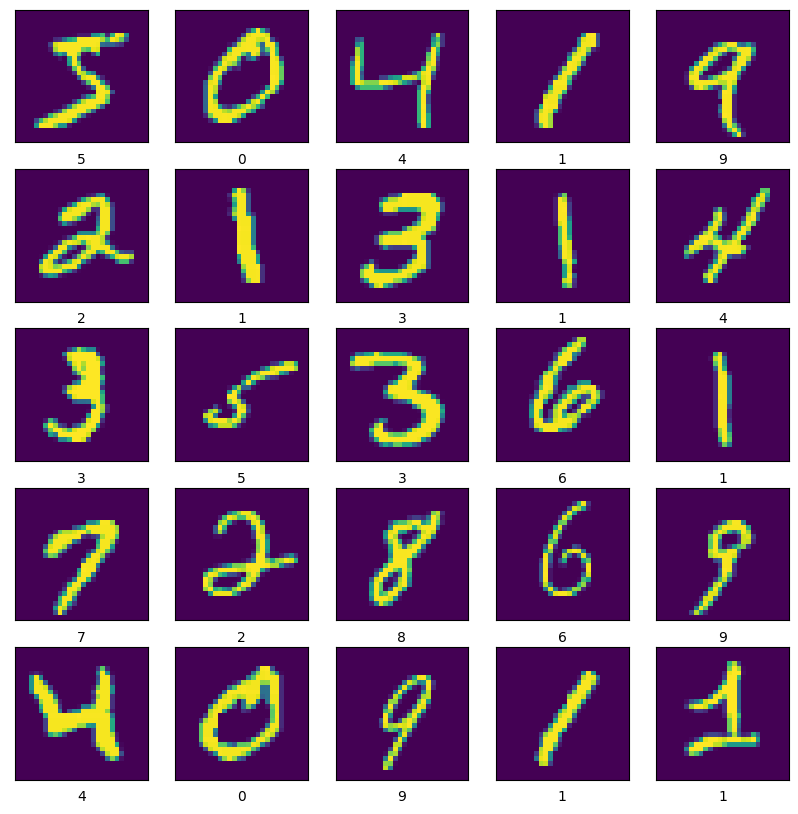

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

### Run a CNN (convolutional neural network)
In the following cells we run a simple CNN which has 2 convolutional layers and will classify, on average, to 98%. A convolutional layer is an integral transform which detects certain features using a filter to pass over the image.
<img src="./_images/convolutionalfilter.gif">


You can learn more about classical CNNs here.

To gather data on our model per epoch, we will include tensorboard and the model checkpoint callback.

In [28]:
# Tensorboard callback
%load_ext tensorboard

# Specify Folders
current_time = str(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
train_log_dir = 'logs/tensorboard/' + current_time
test_log_dir = 'logs/tensorboard/test/' + current_time
path_for_checkpoint_callback = 'logs/summary/'+current_time

# Create callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(
                log_dir=train_log_dir, histogram_freq=1, profile_batch=3
            )

# Model Checkpoint callback
model_ckpt =  tf.keras.callbacks.ModelCheckpoint(
                path_for_checkpoint_callback, save_weights_only=True
            )

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


2022-11-28 19:13:42.331449: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-11-28 19:13:42.332099: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-11-28 19:13:42.346084: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


The classical model is a sequential CNN for 10 class multiclassification. The model contains  1,199,882 trainable parameters.

In [8]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model


cmodel = create_classical_model()
cmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.002),
               metrics=[tf.keras.metrics.CategoricalAccuracy()])

cmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [9]:
cmodel.fit(x_train,
          y_train_onehot,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test[:1000], y_test_onehot[:1000]),
          callbacks=[tensorboard_callback,model_ckpt])

cnn_results = cmodel.evaluate(x_test, y_test_onehot)

Epoch 1/10


2022-11-28 17:49:30.053169: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-28 17:49:30.826369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  3/469 [..............................] - ETA: 1:10 - loss: 2.0496 - categorical_accuracy: 0.2865

2022-11-28 17:49:34.614345: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-11-28 17:49:34.614444: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-11-28 17:49:34.671368: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-11-28 17:49:34.693692: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-11-28 17:49:34.756546: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/tensorboard/20221128-174928/plugins/profile/2022_11_28_17_49_34

2022-11-28 17:49:34.758460: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/tensorboard/20221128-174928/plugins/profile/2022_11_28_17_49_34/RickynoMacBook-Pro.local.trace.json.gz
2022-11-28 17:49:34.776902: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/tensorboard/2022

469/469 [==============================] - ETA: 0s - loss: 0.1888 - categorical_accuracy: 0.9425

2022-11-28 17:49:47.419537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 18s 29ms/step - loss: 0.1888 - categorical_accuracy: 0.9425 - val_loss: 0.0427 - val_categorical_accuracy: 0.9850
Epoch 2/10
257/469 [===============>..............] - ETA: 4s - loss: 0.0747 - categorical_accuracy: 0.9784

KeyboardInterrupt: 

### Analysis of classical layers using Tensorboard
The CNN model accomplishes the classification task incredibly well averaging 98% in performance. We can confirm the performance with the confusion matrix where the model predicted the hand written digits for all 10000 images in the test set. The state of the art classical image classification ML models can accomplish similar performances for incredibly complex images using customized feature extraction, trainable layers and other techniques. 

In [10]:
y_pred = cmodel.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred, y_test)

 19/313 [>.............................] - ETA: 1s

2022-11-28 17:50:03.859374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

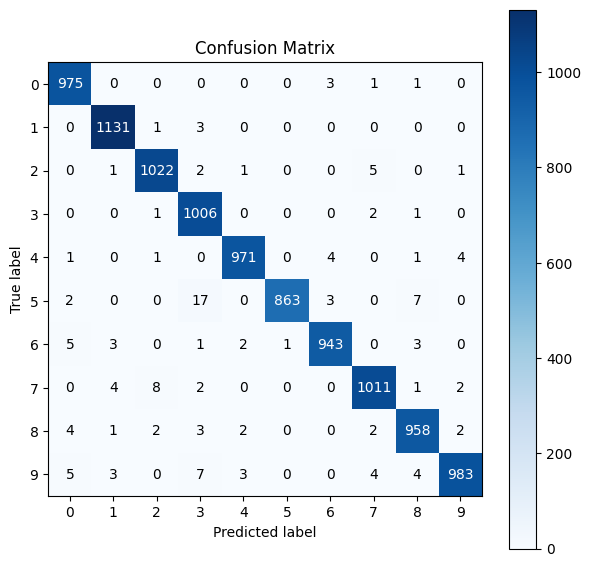

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(y_test, y_pred, ax=ax)

What we see here is that the model can properly classify images incredibly well with a classical CNN. Let's see how a quantum machine learning model stacks up. A 

## Quantum Computing and it's proposed benefits and limitations
Using a quantum computer for a classical machine learning does have its limitations. In fact, this notebook should illustrate to you *why* there needs to be immense progress in hardware and software until a quantum computer is suitable for a classical image lassifiation task. Nonetheless, it's a fun and wonderfully entry point for those with an inclination for machine learning to appreciate the current challenges in QML.

### Current challenge 1: embedding and decoding classical data using quantum circuits

During the NISQ era, there are severe limitations with how to encoding the images onto a quantum register for gate based implementations. For MNIST, the full image cannot be encoded into a quantum register; therefore, downsampling techniques are used to reduce the image size.

- How many qubits are needed



### Current challenge 2: there aren't enough qubits and the qubits that are available are prone to error
How many qubits are needed for encoding  



### Current challenge 2: cost of running circuits

During the NISQ era, there are severe limitations with how to encoding the images onto a quantum register for gate based implementations. For MNIST, the full image cannot be encoded into a quantum register; therefore, downsampling techniques are used to reduce the image size.

- How many qubits are needed



## Preprocess the MNIST dataset for quantum computing
For this demo, we will only apply one classical preprocessing technique and different embedding techniques. This is a non-standard process since embedding techniques can vary in # of qubits,

Further we will keep the quantum layers to be the same for each of the embedding processes.

### Preprocess
The preprocess will be to comfortably encode the image using 8 qubits and various embedding techniques. The process will first:
1. Remove the 5 pixel border around the image which contains no data.
2. Resize the image to 16 x 16.

In [32]:
print(x_train_crop.shape)

(60000, 22, 22, 1)


In [40]:
# Crop and remove border from image
x_train_crop = np.array([x.reshape(28,28)[4:26,4:26] for x in x_train])
x_test_crop =np.array([x.reshape(28,28)[4:26,3:26] for x in x_test])

# Add channel dimension to dataset for resizing [ batch, height, width, channel]
x_train_crop = x_train_crop[..., np.newaxis]
x_test_crop = x_test_crop[..., np.newaxis]

# Resize image to fit on register
x_train_256 = tf.image.resize(x_train_crop, [16,16]).numpy()
x_test_256 = tf.image.resize(x_test_crop, [16,16]).numpy()

# Confirm dataset is still correct batch and shape
print(f'The batch size is: {len(x_train_256)} images')
print(f'Image height and width: {x_train_256[10].shape}')

The batch size is: 60000 images
Image height and width: (16, 16, 1)


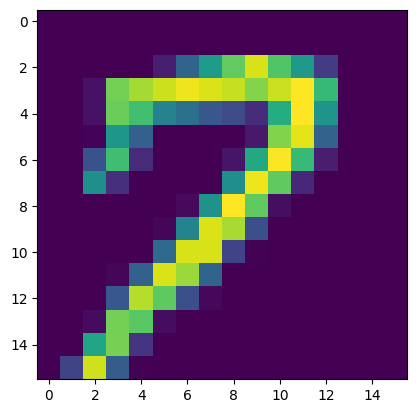

In [41]:
plt.imshow(x_train_256[599])

### Methods of embedding the image into a circuit

First we need to pre-process the data to ensure it can be embedded.

In [14]:
#constants
wires=8


#### Angle Embedding
Angle embedding encodes the image data as rotations applied to the qubit. To fit the data on 8 qubits we will encode each of the 

#### Amplitude Embedding
With amplitude embedding we will encode $2^n$ features where $n$ represents the number of qubits. 

In [54]:
# we will develop the embedding circuit
dev = qml.device('default.qubit', wires=wires)
@qml.qnode(dev)
def amplitude_embedding(inputs):
    qml.AmplitudeEmbedding(features=inputs, wires=range(8), normalize=True)
    return qml.expval(qml.PauliZ(0))

We can verify that our amplitude properly embeds an image into the circuit. The circuit encodes 256 pixels on 8 registers (wires) and returns a Z basis measurement of the first wire. 

In [58]:
print(qml.draw(amplitude_embedding)(x_train_256[0].flatten()))

0: ─╭AmplitudeEmbedding(M0)─┤  <Z>
1: ─├AmplitudeEmbedding(M0)─┤     
2: ─├AmplitudeEmbedding(M0)─┤     
3: ─├AmplitudeEmbedding(M0)─┤     
4: ─├AmplitudeEmbedding(M0)─┤     
5: ─├AmplitudeEmbedding(M0)─┤     
6: ─├AmplitudeEmbedding(M0)─┤     
7: ─╰AmplitudeEmbedding(M0)─┤     


##### What does this embedding strategy look like?
By displaying the block sphere we see that the circuit is 


In [15]:


def amm_strategy(wires): 
    """
    All-qubit Multi-observable Measurement (AMM) strategy applies pauli operators 
    X, Y, Z on all qubits to extract features from disentangled quantum state
    (Zeng et al.).
    """
    readout = []
    # Applies pauli
    for i in range(8):
        readout.append(qml.expval(qml.PauliX(i)))
        readout.append(qml.expval(qml.PauliY(i)))
        readout.append(qml.expval(qml.PauliZ(i)))            
    return  readout
    
@qml.qnode(dev)
def quantum_layer(inputs,weights):
    qml.AmplitudeEmbedding(features=inputs, wires=range(8), normalize=True)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(8))
    return amm_strategy(wires)

In [42]:
shape = qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=8)
weights = np.random.random(size=shape)
print(weights.shape)
print(qml.draw(quantum_layer)(x_train_256[0].flatten(), weights))

(1, 8, 3)
0: ─╭AmplitudeEmbedding(M0)─╭StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>
1: ─├AmplitudeEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>
2: ─├AmplitudeEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>
3: ─├AmplitudeEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>
4: ─├AmplitudeEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>
5: ─├AmplitudeEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>
6: ─├AmplitudeEmbedding(M0)─├StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>
7: ─╰AmplitudeEmbedding(M0)─╰StronglyEntanglingLayers(M1)─┤  <X>  <Y>  <Z>


In [17]:
weight_shapes = {"weights": (1,8,3) }
qlayer = qml.qnn.KerasLayer(quantum_layer, weight_shapes, output_dim=24)

The model we will use will only use the embedding circuit and the strongly entangling layers to verify the performance. 

In [18]:
# Build the Keras model.
qmodel = tf.keras.Sequential([
# The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Flatten(),
    qlayer,
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
qmodel.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
    optimizer=tf.keras.optimizers.Adam(0.02))
qmodel.build(input_shape=[32,16,16,1])

In [20]:
qmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 256)                 0         
                                                                 
 keras_layer (KerasLayer)    (32, 24)                  0 (unused)
                                                                 
 dense_2 (Dense)             (32, 10)                  250       
                                                                 
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
qnn_history = qmodel.fit(x_train_256[:1000],
          y_train_onehot[:1000],
          batch_size=32,
          epochs=5,
          verbose=1,
          validation_data=(x_test_256[:1000], y_test_onehot[:1000]),
          callbacks=[tensorboard_callback,model_ckpt])

In [ ]:
qnn_results = qmodel.evaluate(x_test_256, y_test_onehot)

In [ ]:
y_pred = qmodel.predict(x_test_256)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred, y_test)

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(y_test, y_pred, ax=ax)

#### Other Technique from a paper

### Other techniques (kernel methods etc).

### Running a model


#### Analysis of current implementations using Tensorboard and qBraid SDK

In [ ]:
%tensorboard --logdir logs

## Other methods, kernel methods

In [43]:
# Build the Keras model.
fair_model = tf.keras.Sequential([
# The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [44]:
fair_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
    optimizer=tf.keras.optimizers.Adam(0.02))
fair_model.build(input_shape=[32,16,16,1])

In [45]:
fair_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (32, 256)                 0         
                                                                 
 dense_3 (Dense)             (32, 10)                  2570      
                                                                 
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________


In [46]:
fair_model_history = fair_model.fit(x_train_256[:1000],
          y_train_onehot[:1000],
          batch_size=32,
          epochs=5,
          verbose=1,
          validation_data=(x_test_256[:1000], y_test_onehot[:1000]),
          callbacks=[tensorboard_callback,model_ckpt])

Epoch 1/5


2022-11-28 21:28:57.590998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/32 [..............................] - ETA: 26s - loss: 2.4211 - categorical_accuracy: 0.0625

2022-11-28 21:28:58.008965: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-11-28 21:28:58.008980: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-11-28 21:28:58.205718: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.


 3/32 [=>............................] - ETA: 4s - loss: 2.3433 - categorical_accuracy: 0.1667 

2022-11-28 21:28:58.227071: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-11-28 21:28:58.265920: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58

2022-11-28 21:28:58.269940: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58/RickynoMacBook-Pro.local.trace.json.gz
2022-11-28 21:28:58.302032: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58



25/32 [======================>.......] - ETA: 0s - loss: 1.1064 - categorical_accuracy: 0.6750

2022-11-28 21:28:58.302295: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58/RickynoMacBook-Pro.local.memory_profile.json.gz
2022-11-28 21:28:58.302619: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58
Dumped tool data for xplane.pb to logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58/RickynoMacBook-Pro.local.xplane.pb
Dumped tool data for overview_page.pb to logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58/RickynoMacBook-Pro.local.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58/RickynoMacBook-Pro.local.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58/Ricky

27/32 [========================>.....] - ETA: 0s - loss: 1.0642 - categorical_accuracy: 0.6898

noMacBook-Pro.local.tensorflow_stats.pb
Dumped tool data for kernel_stats.pb to logs/tensorboard/20221128-191342/plugins/profile/2022_11_28_21_28_58/RickynoMacBook-Pro.local.kernel_stats.pb



32/32 [==============================] - ETA: 0s - loss: 0.9908 - categorical_accuracy: 0.7070

2022-11-28 21:29:00.669919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 5s 133ms/step - loss: 0.9908 - categorical_accuracy: 0.7070 - val_loss: 0.6895 - val_categorical_accuracy: 0.7970
Epoch 2/5
32/32 [==============================] - 1s 26ms/step - loss: 0.4232 - categorical_accuracy: 0.8730 - val_loss: 0.6121 - val_categorical_accuracy: 0.8190
Epoch 3/5
32/32 [==============================] - 0s 14ms/step - loss: 0.3077 - categorical_accuracy: 0.9180 - val_loss: 0.5371 - val_categorical_accuracy: 0.8360
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.2478 - categorical_accuracy: 0.9330 - val_loss: 0.5073 - val_categorical_accuracy: 0.8380
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.2102 - categorical_accuracy: 0.9490 - val_loss: 0.4955 - val_categorical_accuracy: 0.8420


In [47]:
fair_results = fair_model.evaluate(x_test_256, y_test_onehot)

313/313 [==============================] - 2s 7ms/step - loss: 0.4804 - categorical_accuracy: 0.8583


In [50]:
y_fair_pred = fair_model.predict(x_test_256)
y_fair_pred = np.argmax(y_fair_pred, axis=1)
print(y_test, y_fair_pred)

313/313 [==============================] - 0s 1ms/step
[7 2 1 ... 4 5 6] [7 2 1 ... 4 8 6]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

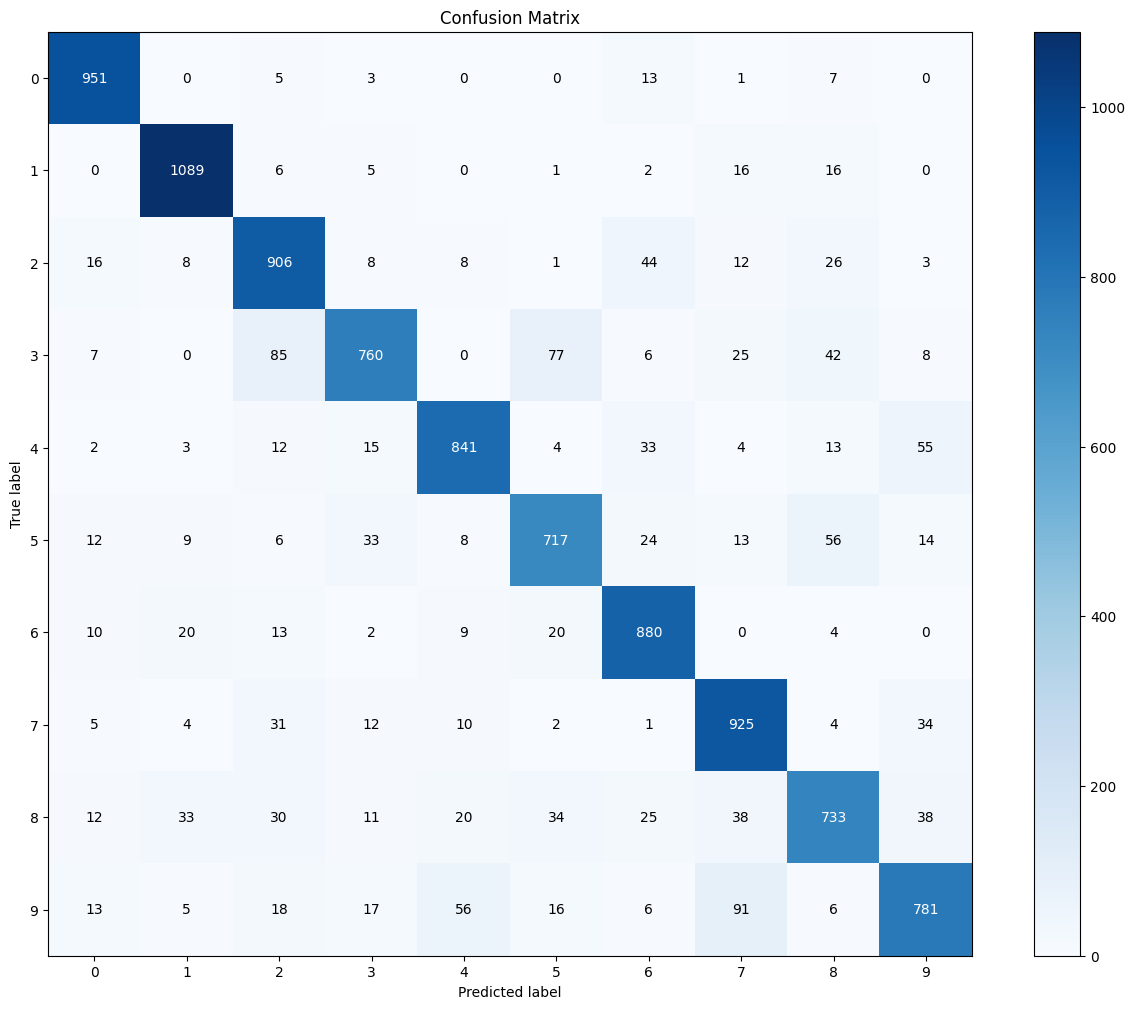

In [51]:
fig, ax = plt.subplots(figsize=(16,12))
plot_confusion_matrix(y_test, y_fair_pred, ax=ax)

In [ ]:
%tensorboard --logdir logs/